In [47]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages, helps with deprecation

# load dataset
series = read_csv('updated_bus.csv', header=0, index_col=0, parse_dates=True,
                  squeeze=True)

In [64]:
sat_series = series.loc[series['Day'] == "SAT."]
sun_series = series.loc[series['Day'] == "SUN."]
wd_series = series.loc[series['Day'] == "WEEKDAY"]

sat_series = sat_series.drop(columns=['Day'])
sun_series = sun_series.drop(columns=['Day'])
wd_series = wd_series.drop(columns=['Day'])
wd_series.dropna(inplace=True)

### ARIMA forecast for PGH Port Authority Bus Route 16, Saturday Schedule

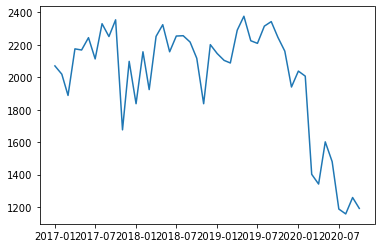

In [49]:
pyplot.plot(sat_series)
pyplot.show()

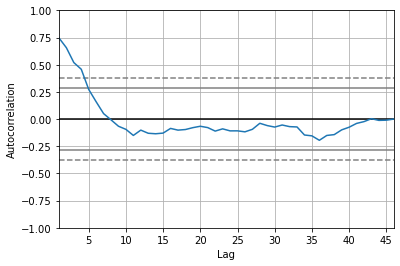

In [50]:
autocorrelation_plot(sat_series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:               D.Riders   No. Observations:                   45
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -297.028
Method:                       css-mle   S.D. of innovations            175.898
Date:                Sun, 06 Dec 2020   AIC                            608.057
Time:                        17:53:54   BIC                            620.703
Sample:                    02-01-2017   HQIC                           612.771
                         - 10-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -19.3394     25.009     -0.773      0.439     -68.357      29.678
ar.L1.D.Riders    -0.4441      0.144     -3.077      0.002      -0.727      -0.161
ar.L2.D.Riders    -0.1235      0.142

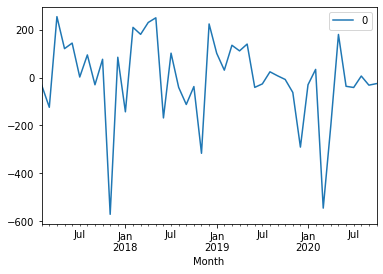

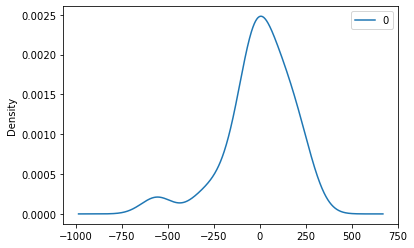

                0
count   45.000000
mean    -3.527233
std    179.095218
min   -571.036656
25%    -40.777785
50%      2.501023
75%    111.748817
max    254.744879


In [51]:
# fit model
model = ARIMA(sat_series, order=(5,1,0))
model_fit = model.fit(disp=0)

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind= 'kde' )
pyplot.show()

# summary stats of residuals
print(residuals.describe())

predicted=2255.085752, expected=2209.000000
predicted=2265.083378, expected=2315.000000
predicted=2351.883375, expected=2343.000000
predicted=2313.076397, expected=2246.000000
predicted=2261.118258, expected=2161.000000
predicted=2250.274838, expected=1940.000000
predicted=2121.399027, expected=2038.000000
predicted=2024.304395, expected=2007.000000
predicted=2037.115091, expected=1402.000000
predicted=1600.464494, expected=1342.000000
predicted=1344.300270, expected=1602.000000
predicted=1550.259103, expected=1480.000000
predicted=1247.221076, expected=1188.000000
predicted=1147.872722, expected=1158.000000
predicted=1294.457440, expected=1259.000000
predicted=1220.006899, expected=1192.000000
Test RMSE: 204.621


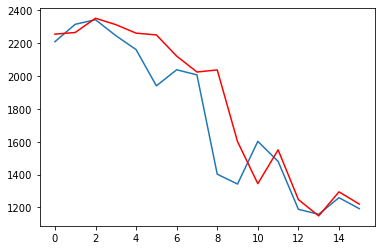

In [52]:
# split into train and test sets
X = sat_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### ARIMA forecast for PGH Port Authority Bus Route 16, Sunday Schedule

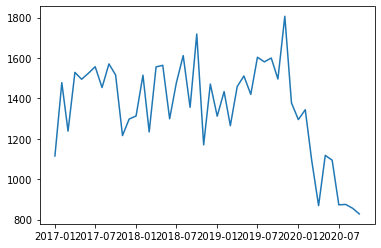

In [53]:
pyplot.plot(sun_series)
pyplot.show()

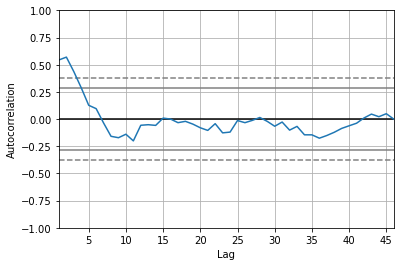

In [54]:
autocorrelation_plot(sun_series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:               D.Riders   No. Observations:                   45
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -292.605
Method:                       css-mle   S.D. of innovations            159.828
Date:                Sun, 06 Dec 2020   AIC                            599.210
Time:                        17:54:11   BIC                            611.857
Sample:                    02-01-2017   HQIC                           603.925
                         - 10-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.2382     18.134     -0.454      0.650     -43.780      27.304
ar.L1.D.Riders    -0.7228      0.151     -4.788      0.000      -1.019      -0.427
ar.L2.D.Riders    -0.1244      0.180

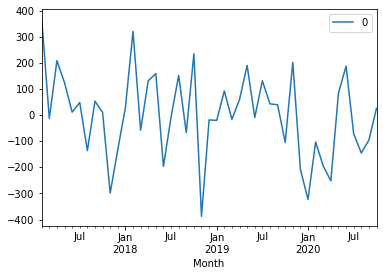

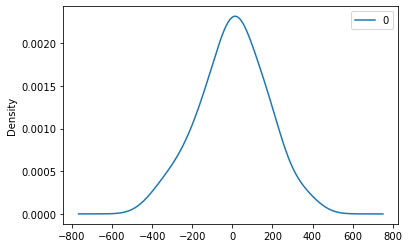

                0
count   45.000000
mean     2.092593
std    166.014908
min   -387.608488
25%   -102.220591
50%     11.486498
75%    125.097039
max    371.238219


In [55]:
# fit model
model = ARIMA(sun_series, order=(5,1,0))
model_fit = model.fit(disp=0)

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind= 'kde' )
pyplot.show()

# summary stats of residuals
print(residuals.describe())

predicted=1490.291834, expected=1604.000000
predicted=1487.722050, expected=1581.000000
predicted=1568.035407, expected=1600.000000
predicted=1614.971179, expected=1496.000000
predicted=1616.242759, expected=1807.000000
predicted=1570.840687, expected=1378.000000
predicted=1718.193353, expected=1295.000000
predicted=1524.880123, expected=1344.000000
predicted=1335.893717, expected=1093.000000
predicted=1200.652284, expected=869.000000
predicted=1016.261474, expected=1118.000000
predicted=864.474115, expected=1094.000000
predicted=965.392690, expected=873.000000
predicted=1052.608212, expected=875.000000
predicted=961.658570, expected=856.000000
predicted=797.465350, expected=828.000000
Test RMSE: 194.678


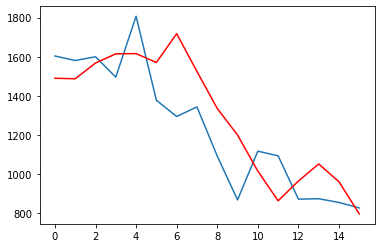

In [56]:
# split into train and test sets
X = sun_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### ARIMA forecast for PGH Port Authority Bus Route 16, Weekday Schedule

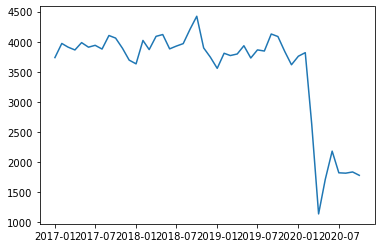

In [57]:
pyplot.plot(wd_series)
pyplot.show()

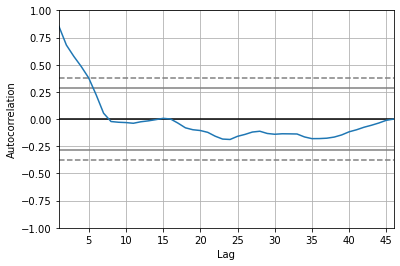

In [58]:
autocorrelation_plot(wd_series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:               D.Riders   No. Observations:                   45
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -322.963
Method:                       css-mle   S.D. of innovations            315.339
Date:                Sun, 06 Dec 2020   AIC                            659.927
Time:                        17:54:38   BIC                            672.574
Sample:                    02-01-2017   HQIC                           664.641
                         - 10-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -43.4666     44.275     -0.982      0.326    -130.244      43.311
ar.L1.D.Riders     0.2015      0.150      1.347      0.178      -0.092       0.495
ar.L2.D.Riders    -0.4115      0.150

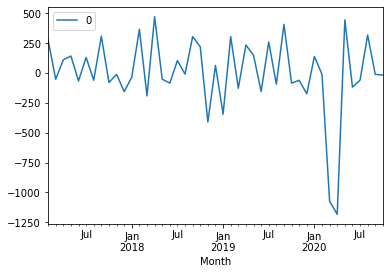

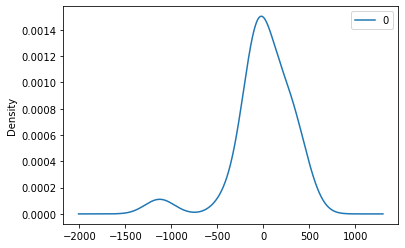

                 0
count    45.000000
mean      0.594714
std     319.417741
min   -1182.855658
25%     -84.619477
50%     -11.564734
75%     219.359408
max     471.672438


In [59]:
# fit model
model = ARIMA(wd_series, order=(5,1,0))
model_fit = model.fit(disp=0)

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind= 'kde' )
pyplot.show()

# summary stats of residuals
print(residuals.describe())

In [ ]:
# split into train and test sets
X = wd_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()